<a href="https://colab.research.google.com/github/gmention-at-cea/ST4_PP_2021/blob/main/TD2_counting_and_fitting_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing data from different ways

With this notebook, we will practice the three main statistical analyses we have seen in the course (see Fig. 1):

1. Rate analysis
2. Binned shape analysis
3. Unbinned shape analysis



<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2021/main/Stat_analyses.png" width="800px">
<figcaption><b>Fig. 1</b> | The 3 main categories of analyses.</figcaption>

For this purpose we will use an example we have introduced several times: the Higgs decay to 2 photons (also called the $H\rightarrow\gamma\gamma$ channel, see Fig. 2).

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2021/main/Higgs_2gammas.png" width="800px">
<figcaption><b>Fig. 2</b> | Decay of the Higgs boson into 2 gammas. Invariant mass $m_{\gamma\gamma}$ distribution of the events.</figcaption>

We will start with the basic **rate analysis**.

We will then move to the full likelihood treatment of the dataset where we will practice with the **unbinned likelihood** and **the extended unbinned likelihood**.

Finally we will also analyse this dataset with a **binned likelihood** approach.

We will also compare the precision of the different approaches and their ease of use.


## A word about colors and style in plots

Here is a nice default color palette to use in your graphics with `matplotlib`.

To use one of these colors use for instance `color='tab:red'` in your graphic call.

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2021/main/tableau_named_colors.png" width="800px">
<figcaption><b>Fig. 3</b> | Name of the basic colors in matplotlib.</figcaption>.


In [3]:
import matplotlib.colors as colors
colors.TABLEAU_COLORS

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

The next piece of code is to display the graphics, plots, histograms in vector format (png, or jpg are raster format, svg, eps are vector formats for instance). Vector formats avoid pixelization and can be rescaled at convenience without quality loss. The svg, for scalable vector graphics is a web browser standard.

In [4]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'svg')
%config InlineBackend.figure_format ='svg'

# Import the nice matplotlib pyplot package
from matplotlib import pyplot as plt
# Set up the figure display to the "R ggplot" style:
# light gray background, white grid, and the tick marks on the axes face outwards.
plt.style.use('ggplot')

import numpy as np

## Loading the dataset

Her we load a dataset prepared for this analysis.

This is a dataset mimicking the Higgs to gamma gamma plot above (see Fig. 2).

We load this data set into a variable called `X`.



In [5]:
url = ('https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2021/main/Higgs_2gammas.dat')
import requests
data_file = requests.get(url, allow_redirects=True)
open('Higgs_2gammas.dat','wb').write(data_file.content)

# We now load the dataset into X
X = np.loadtxt('Higgs_2gammas.dat')

## Question 1: plot/display your dataset

First get a taste about this dataset.
1. What is it's size (number of elements)?
2. What is the range of values?
3. Do a histogram of this data set. (Use `numpy.histogram` and `matplotlib.pyplot.hist`. Check their use. What are they for?)
4. Investigate the different options in `numpy.hist` especially the one concerning the **normlisation of the histogram**. There are basically 2 options, one where the output will contain the number of samples in each bin and one where the output will be the empirical probability density function within the bin, normalized such that the integral over the dataset range is 1. Does the sum of the bin contents add to 1?

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2021/main/Histograms.png" width="800px">
<figcaption><b>Fig. 4</b> | Two main ways to display histograms. The first one is the basic counting of the number of occurences of $x_1,\ldots,x_n$ which fall inside the bin range. We call it $N$. The other way is related to the probability density function. The counting $N$ is thus normalised with respect to the bin width $\Delta{x}$ and the total number of events, $n$, in the data sample $(x_1,\ldots,x_n)$</figcaption>.


### Examples of histograms with options

#### Basic histogram - no option

use the `plt.hist` command to display a histogram of the X random varible.

#### Changing the number of bins

Now, set the number of bins to 100.

#### Defining the bins (number, width,...)

Use `numpy.linspace` to define the exact wanted binning: 100 bins from 0 to 600. Use hist to draw the histogram with such a binning. Check this is correct. For instance, if you would like to have 6 bins, what should be the commande to provide?

Now, use `numpy.arange` to specify the bins. If I want 6 bins between 0 and 600 with the numpy.arange commande, how should I proceed?

#### Zooming on an interesting part of the histogram

In the previous plotting, did you notice something different in the 0 to 600 range? Look more carefully around 100 to 200. With 100 bins. Use `plt.hist` commande as before.

Use the `range` and `bins` keyword of `plt.hist` command to draw the histogram. If needed, you can check the documentation with `plt.hist?` int eh `CODE` cell below or in the **scratch code cell** from the menu **Insert>Scratch code cell**.

#### Plotting histograms as dots with error bars

We would like to display the histogram with dots and error bars as seen in the lecture and in the figure below.

<img src="https://raw.githubusercontent.com/gmention-at-cea/ST4_PP_2021/main/Error_bars.png" width="800px">
<figcaption><b>Fig. 5</b> | Drawing count data with a dot and an error bar. Data count follows as Poisson distribution. Here $k$ counts are observed. The estimated variance is thus $k$ and so the standard deviation is $\sqrt{k}$. The dot is thus displayed at $y=k$ for this bin content and the error bars extend up to $y_{\rm up} = k+\sqrt{k}$ and down to $y = k-\sqrt{k}$ by convention.</figcaption>

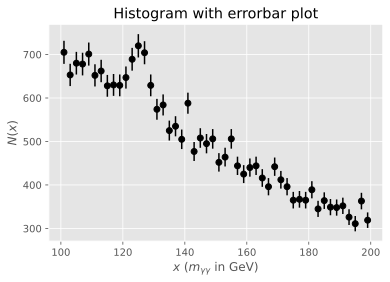

In [7]:
x = np.linspace(100,200,201)
xbin = np.linspace(100,200,51)
# use of the numpy.histogram command to get the bin contents
y, bin_edges = np.histogram(X, bins=xbin)
# xbin and bin_edges should be identical
# bin_edges is number of y entries + 1 => not convenient for plotting
# Define here the bin centers:
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

# scale properly the bin content and the error bars...
# This is just a relative sacling. We do not change the data...
# plt.hist(X,bins=bin_edges)
plt.errorbar(bin_centers,y,yerr=np.sqrt(y),fmt='ko');
plt.title('Histogram with errorbar plot');
plt.xlabel('$x$ ($m_{\gamma\gamma}$ in GeV)');
plt.ylabel('$N(x)$');

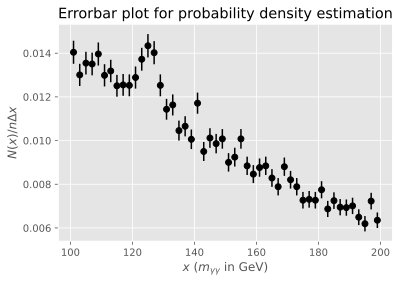

In [8]:
# Define the bin normalisation to get a binned empirical probability distribution
ndx = np.sum(y*np.mean(np.diff(xbin)))

plt.errorbar(bin_centers,y/ndx,yerr=np.sqrt(y)/ndx,fmt='ko');
plt.title('Errorbar plot for probability density estimation');
plt.ylabel('$N(x)/n\Delta{x}$');
plt.xlabel('$x$ ($m_{\gamma\gamma}$ in GeV)');

# (1) Rate analysis

In this part we will perform a rate analysis on the `X` dataset.




**Signal and Backgrounds**:
We focus here on the data between 100 and 200 GeV.

The signal we are looking for is the decay of the Higgs boson in two photons. We have seen that this signal should be located around the Higgs mass, here at 125 GeV. We see indeed an excess of events around this value. To quantify the excess we woulk like to do a quick estimate. We therefore defign two regions. The _sideband_ is a region where only the background is present or where it is excessively dominating the signal. We decide here for instance that the two regions $100<X<120$ GeV and $130<X<200$ GeV are regions dominated by the backgrounds. We call them `side_band`. The signal region is defined as the region with $120<X<130$ GeV. We call it `signal_band`.





## Question2: Defining Signal region and sidebands

Plot on a unique histogram in blue the sideband region (background), in red the signal region. For instance, use 50 bins  from 100 to 200 for each of these 2 histograms.

In [ ]:
# Defining side_band and signal_band variables

# Plotting the background histogram

# Plotting the signal region histogram


# plt.title('Histogram with signal band (red) and sideband (blue)');
# plt.ylabel('$N(x)$');
# plt.xlabel('$x$ ($m_{\gamma\gamma}$ in GeV)');

## Question 3: counting S+B and B

The overall shape of the collected events decreases over the $[100;200]$ range. We propose first to get a quick estimate potential signal and background to restict the collected data event closer to the signal region. Let's focus on the $[100;150]$ range now.

1. We count the background $B_L$ in the left sideband and call this variable `BL`.
2. We count the background $B_R$ in the right sideband and call this variable `BR`.
3. We count the candidates (signal and background) in the signal region and call this variable `SB`.



## Question 4: sidebands and signal region histogram
Plot the 3 bin histogram of counts in Left & Right sidebands and signal region with correct bin width (region extent).

Are you surprised by the shape? Why?

Use the density property of histogram and plot again this histogram. Does this shape looks more alike the original histogram with equal bins?

## Question 5: Estimating the B in S+B from sidebands

Despite the shape of the global event distribution with number of counts decreasing quickly between left and right sidebands we still continue and would like to use them to get a quick and dirty estimate of the number of background events in the signal region. We propose to use the average of both background estimates to get an idea of the background counts in the signal region.

How many signal events do you estimate through this quick method? What is the uncertainty? (You have to remember the basic probability distribution associated to histogram from the lectures).

In [1]:
from numpy import nan

xxx = nan

print('>> Both Left and Right')
Signal_estimate_rate = xxx
Signal_estimate_uncertainty = xxx
print("Signal estimate from rate analysis = %5.2f ± %5.2f" 
  % (Signal_estimate_rate, Signal_estimate_uncertainty))

print('>> Left only')
Signal_estimate_rate_L = xxx
Signal_estimate_uncertainty_L = xxx
print("Signal estimate from rate analysis = %5.2f ± %5.2f" 
  % (Signal_estimate_rate_L, Signal_estimate_uncertainty_L))

print('>> Right only')
Signal_estimate_rate_R = xxx
Signal_estimate_uncertainty_R = xxx
print("Signal estimate from rate analysis = %5.2f ± %5.2f" 
  % (Signal_estimate_rate_R, Signal_estimate_uncertainty_R))

Z = Signal_estimate_rate/Signal_estimate_uncertainty
print('Significance in number of sigmas w.r.t. standard normal: Z = %.1f σ' % Z)

>> Both Left and Right
Signal estimate from rate analysis =   nan ±   nan
>> Left only
Signal estimate from rate analysis =   nan ±   nan
>> Right only
Signal estimate from rate analysis =   nan ±   nan
Significance in number of sigmas w.r.t. standard normal: Z = nan σ


In [ ]:
print('Total number of candidate events: %d' % np.size(X))
print('Estimage of number of signal events: %d' % Signal_estimate_rate)

Do you think it is possible to be confident with such an analysis? Why? Are the 2 background estimates compatible with each other?

## Question 6: Finding a better estimate of B in S+B

We propose to use a likelihood approach **on the sidebands** to fit the background distribution **outside the signal region**. For this purpose you will use the following function: 
$$f_{\rm exp}(x;A,\alpha) = A\times \alpha e^{-\alpha x}$$

This is a typical exponential distribution taking into account a background normalisation $A$.

You will have to:
1. Define the subset of `X` values outside the signal region. Give them this variable the name `Xside` .
2. Define `fexp` function  to be minimised: `fexp(x,par)` where `x` are the data points at which the likelihood will be evalutaed and `par` are the parameters array $(A,\alpha)$.
3. Define `loglik_side` as $-2\sum_{i=1}^n\log(f_{\rm exp}(x;A,\alpha))$.
4. Read the documentation of `scipy.optimize.minimize` function. You will have to provide `loglik_side`, `par0` and maybe `par_bnds` in the call. `par0` are initial guess values of the parameters. `par_bnds` are parameter boundary conditions, for instance if you want both parameters to be positive you should write `par_bnds = ((0, None), (0, None))` and provide `minimize` with this.

What are the parameter values and uncertainties? To get the uncertainties you will have to use the inverse Hessian matrix provided by `minimize`.



In [ ]:
from scipy.optimize import minimize


## Question 7: Plotting the fit output

Plot the output of the fitted function and the histogram of the sideband data.

Estimate the amount of background `B_est` in the signal region from the sidebands.




In [ ]:
Significance_G = Srate/dS_rate
Significance_P = np.sqrt(2*((Srate+B_est)*np.log(1+Srate/B_est)-Srate))

print('Z = ',Significance_G)

With this we end the part of the analysis on count rate analysis.

# (2) Unbinned shape analysis


We will now perform the same kind of fit but shape analyses.

We start with the unbinned shape analyses.

1. Unbinned likelihood
2. Extended unbinned likelihood

The difficulties often encountered with this type of fit is about the correct definition of the PDFs. One should in particular pay a lot of attention to the correct normalisation of the PDFs.


## Question 8: Plot the PDFs, first!

The first thing to do is therefore to plot the assumed distributions we have and the rough guessee on S and B we extracted from the rate analysis. This should allow to get an idea of the plot to do.

## Quesiton 9: Defining and fitting the unbinned likelihoods

In [ ]:
from scipy.optimize import minimize
from scipy.stats import expon, norm, poisson

X = X[(X>100) & (X<200)]

## (2.a) Unbinned likelihood

Define here the unbinned likelihood as seen during the lecture. 

Use `S, B, alpha, mH, sH` parameters to define this likelihood `lik(x,par)` of a single $x_i$.

Pay attention to the normalisation of the PDFs.

Then define the unbinned log likelihood as the sum of the log-likleihood of all the $x_i$ in the dataset and call it `ull(par)`.

Perform the minimisation of the log-likelihood and get the fitted parameters `S, B, alpha, mH, sH`.

Do a plot of the best fit model using an errorbar plot for the data and plot the best fit PDF of the signal+background model you just got.

## (2.b) Extended unbinned likelihood

We now extend the unbinned likelihood with the global counting rate on the full histogram. Write this extended likelihood as we have seen during the lectures.

First code `elik(x,par)` for a single entry `x_i`

Then code `ull_ext(par)`

Minimise this new likelihood with respect to the model parameters and get the best fitted values.

Do a plot of the best fit model using an errorbar plot for the data and plot the best fit PDF of the signal+background model you just got.

# (3) Binned shape analysis

## Question 10: Defining and fitting the binned likelihood

Another possible analysis of the histogram is to used a binned likelihood.

We have first to define the content of each bin with a new function `BinContent(x,par)`. As long as the bin width is not to large and the PDF are slowy varying over the bin, it is possible to approximate the integral of the PDFs over each bin by the PDF taken at the central value multiplied by the bin width (but don't forget to multiply by the bin width!).

Then define the likelihood of a single bin in `likp(xi,yi,par)`.

Then defined the joint loglikelihood of all the bins in `bll(par)` for the observed dataset.

Then find the minimum of this binned loglikelihood and get the best fit parameters.


Finally, plot the errorbar plot of the data sample and plot the best fitted model using a `step` plot from `matplotlib.pyplot` for instance.

# Extra: Profiling the likelihood

To get for instance the profiled likelihood on a parameter of interest (here suppose we hare mainly interested in `S` parameter), we have to fix the value of `S` and minimise the loglokelihood with respect to all the other parameters. We get a value of the loglikelihood and store it. We repeat this process for a range of values of `S` parameter around the best fit of `S`. Then we plot this profile subtracted from the value of the loglikelihood at the best fit.